In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X, y = pd.DataFrame(boston['data'], columns=boston['feature_names']), pd.DataFrame(boston['target'], columns=['MEDV'])

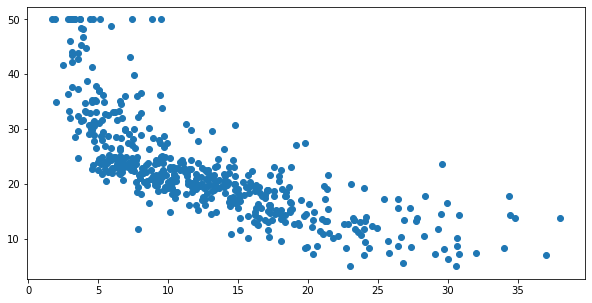

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(X.LSTAT, y)
plt.show()

In [ ]:
'''
독립변수와 종속변수의 관계가 비선형인 경우 다양한 비선형 함수를 사용해서 변수 변환을 해서 선형회귀 문제로 바꿔야 한다.
가장 쉬운 방법은 기저함수를 사용하는 것이다.
'''

In [5]:
def makePolyBasis(num):
    return np.polynomial.Polynomial.basis(num)

In [6]:
def makeChebyshev(num):
    return np.polynomial.chebyshev.Chebyshev.basis(num)

In [7]:
pb_1 = np.polynomial.Polynomial.basis(1)
pb_2 = np.polynomial.Polynomial.basis(2)
pb_3 = np.polynomial.Polynomial.basis(3)
pb_4 = np.polynomial.Polynomial.basis(4)

In [8]:
X['LSTAT**2'] = np.polynomial.Polynomial.basis(2)(X['LSTAT'].values)
test_X = X[['LSTAT', 'LSTAT**2']]

In [9]:
test_X2 = X[['LSTAT']]

In [10]:
test_X = sm.add_constant(test_X)
test_X2 = sm.add_constant(test_X2)

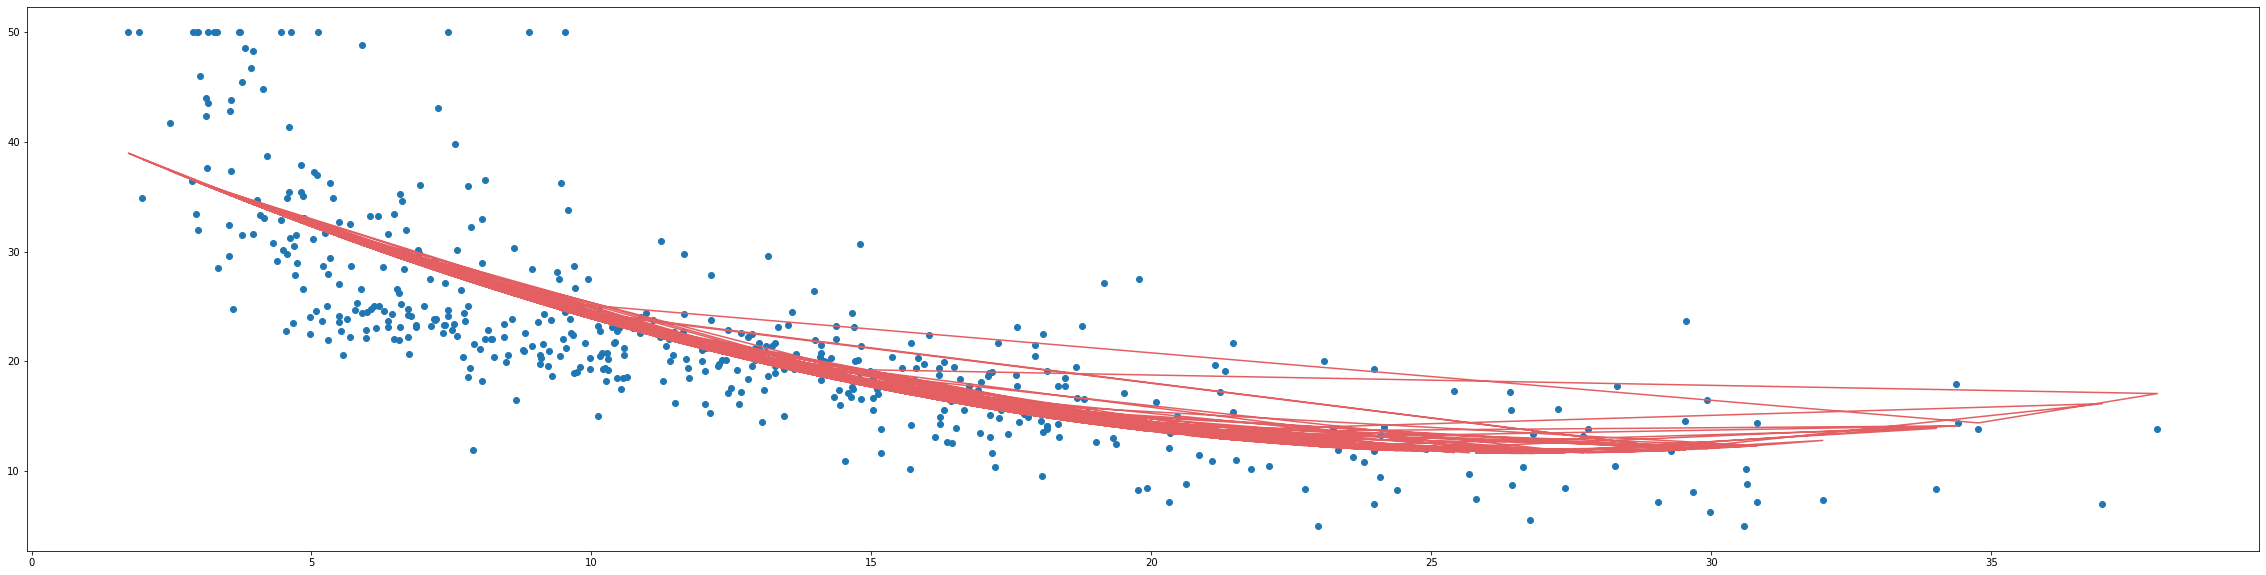

In [11]:
model = sm.OLS(y, test_X)
rlt = model.fit()

plt.figure(figsize=(40, 10))
plt.scatter(X.LSTAT, y.values)
plt.plot(X.LSTAT, rlt.predict(test_X), color='#e35f62')
plt.show()

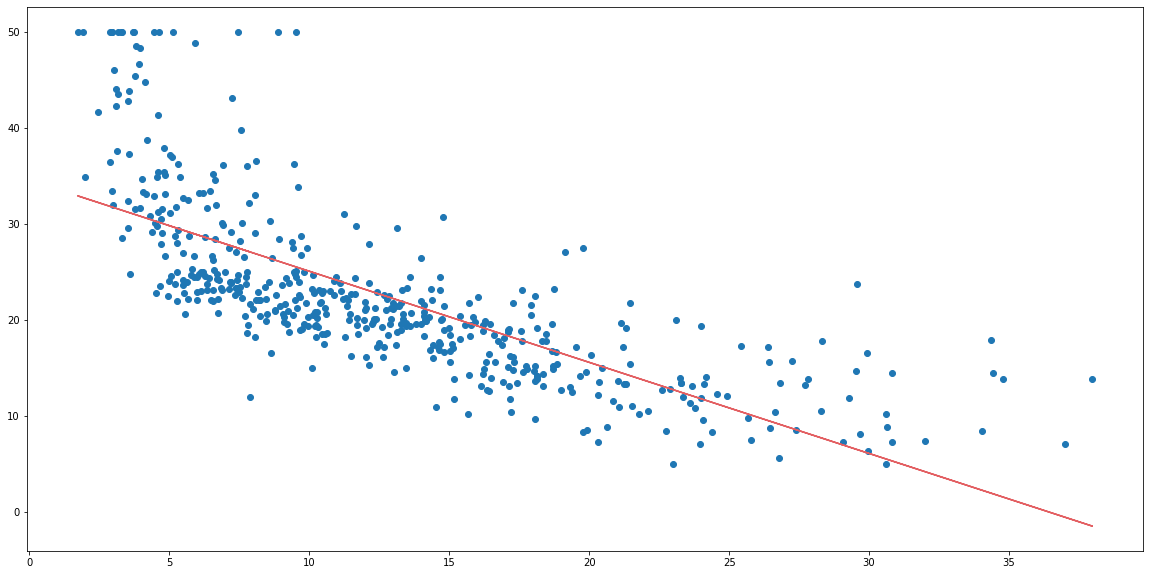

In [12]:
model2 = sm.OLS(y, test_X2)
rlt2 = model2.fit()

plt.figure(figsize=(20, 10))
plt.scatter(test_X2.LSTAT, y.values)
plt.plot(test_X2.LSTAT, rlt2.predict(test_X2), color='#e35f62')
plt.show()

In [13]:
rlt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        18:34:52   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
LSTAT**2       0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
rlt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        18:34:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""